In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
from keras.layers import Dense, Flatten
import keras.callbacks as callbacks;

In [3]:
test = pd.read_csv("Datasets/emnist-balanced-test.csv").to_numpy()
train = pd.read_csv("Datasets/emnist-balanced-train.csv").to_numpy()
train.shape

(112799, 785)

In [4]:
x_train, x_valid = train[5000:, 1:], train[:5000, 1:]
x_train, x_valid = x_train / 255.0, x_valid/ 255.0
y_train, y_valid = train[5000:, 0], train[:5000, 0]

x_train.shape, y_train.shape

((107799, 784), (107799,))

In [5]:
y_train_unique = numpy.unique(y_train)
y_train_unique.size

47

In [6]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(y_train_unique.size, activation="softmax")
])

In [7]:
model.summary(), model.input_shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 47)                14147     
                                                                 
Total params: 520,547
Trainable params: 520,547
Non-trai

(None, (None, 784))

In [8]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [9]:
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/100
3369/3369 [==============================] - 6s 2ms/step - loss: 1.8733 - sparse_categorical_accuracy: 0.5011 - val_loss: 1.0957 - val_sparse_categorical_accuracy: 0.6804
Epoch 2/100
3369/3369 [==============================] - 6s 2ms/step - loss: 0.9282 - sparse_categorical_accuracy: 0.7214 - val_loss: 0.8022 - val_sparse_categorical_accuracy: 0.7600
Epoch 3/100
3369/3369 [==============================] - 5s 2ms/step - loss: 0.7331 - sparse_categorical_accuracy: 0.7715 - val_loss: 0.7007 - val_sparse_categorical_accuracy: 0.7784
Epoch 4/100
3369/3369 [==============================] - 5s 2ms/step - loss: 0.6320 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.6264 - val_sparse_categorical_accuracy: 0.7978
Epoch 5/100
3369/3369 [==============================] - 5s 2ms/step - loss: 0.5685 - sparse_categorical_accuracy: 0.8156 - val_loss: 0.5674 - val_sparse_categorical_accuracy: 0.8202
Epoch 6/100
3369/3369 [==============================] - 5s 2ms/step - loss: 0.5224 -

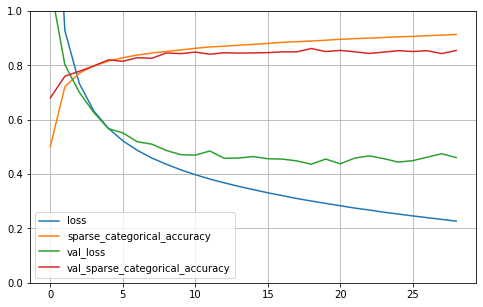

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
x_test = test[:3,1:]
x_test = x_test / 255.0
y_test = test[:3, 0]
x_test.shape, y_test.shape

((3, 784), (3,))

In [28]:
y_proba = model.predict(x_test)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ,
        0.38, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.93, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
        0.04, 0.  , 0.  ]], dtype=float32)

In [29]:
classes = numpy.argmax(y_proba, axis=1)
classes

array([39,  9, 26], dtype=int64)